## Imports and installations

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install top2vec==1.0.16
!pip install tensorflow tensorflow_hub tensorflow_text
!pip install 'top2vec[sentence_encoders]'
!pip install 'top2vec[sentence_transformers]'
!pip install 'top2vec[indexing]'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.1 MB/s 
     |████████████████████████████████| 5.2 MB 50.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 8.4 MB/s 
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=62d911ed8229872897ff2d01303bd0921383f534cf9d60b995029cf39d12881e
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342150 sha256=1f0e2331063bd4f3e5f4c565fd360e0537b9deeed8d23abddfcc36119082ba46
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-no

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from top2vec import Top2Vec

# Read data

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/large_df_inc17')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.sort_values(by=['Datetime'],inplace=True)

In [ ]:
df.reset_index()


index  Unnamed: 0                  Unnamed: 0.1  \
0        1056558     1786720                   ‚ÄúA lovely   
1        1111762     1914382           The 'homeless hero'   
2          13269       13793                         13774   
3          13268       13792                         13773   
4          13267       13791                         13772   
...          ...         ...                           ...   
1337415   180355      270139                             3   
1337416   180354      270138                             2   
1337417   180353      270137                             1   
1337418   180352      270136                             0   
1337419     6974        7038  .. http://tinyurl.com/cns7o7   

                           Datetime  \
0                              warm   
1         who was donated over ¬£52   
2         2008-07-28 07:20:28+00:00   
3         2008-07-28 07:50:03+00:00   
4         2008-07-28 07:50:05+00:00   
...                             ...   
1337415   2022-06-09 23:45:09+00:00   
1337416   2022-06-09 23:49:21+00:00   
1337417   2022-06-09 23:50:00+00:00   
1337418   2022-06-09 23:56:58+00:00   
1337419                         NaN   

                                                Tweet Id  \
0                                                   kind   
1        000 for helping Manchester Arena terror victims   
2                                            870335870.0   
3                                            870349691.0   
4                                            870349721.0   
...                                                  ...   
1337415                            1535045367053549568.0   
1337416                            1535046424026660864.0   
1337417                            1535046584559357952.0   
1337418                            1535048339720380416.0   
1337419                                              NaN   

                                                      Text  \
0                                                sensitive   
1                         admits he stole from the wounded   
2        The end of the pier show: Weston-Super-Mare lo...   
3        The end of the pier show: Weston-super-Mare lo...   
4        Neighbours from hell: The £65m &#039;Bitch fro...   
...                                                    ...   
1337415  Friends of ex-Qatari royal dead of OD say 'no ...   
1337416  EXCLUSIVE: Britney Spears' big brother seen ru...   
1337417  Ooh, today's Wordle puzzle is a tricky one, wh...   
1337418  Molly-Mae Hague's dad discusses her 'unfair an...   
1337419                                                NaN   

                                              Unnamed: 4  \
0         generous soul with a touch of naughty! RIP.‚Äù   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
1337415                                              NaN   
1337416                                              NaN   
1337417                                              NaN   
1337418                                              NaN   
1337419                                              NaN   

                                              preprocessed  
0                                                sensitive  
1                                     admits stole wounded  
2        end pier show weston super mare loses attracti...  
3        end pier show weston super mare loses attracti...  
4        neighbour hell £65m 039 bitch budapest 039 uns...  
...                                                    ...  
1337415   friend ex qatari royal dead od say way used drug  
1337416  exclusive britney spear big brother seen runni...  
1337417  ooh today wordle puzzle tricky one put togethe...  


In [ ]:
df.head()

Unnamed: 0         Unnamed: 0.1                    Datetime  \
1056558     1786720          ‚ÄúA lovely                        warm   
1111762     1914382  The 'homeless hero'   who was donated over ¬£52   
13269         13793                13774   2008-07-28 07:20:28+00:00   
13268         13792                13773   2008-07-28 07:50:03+00:00   
13267         13791                13772   2008-07-28 07:50:05+00:00   

                                                Tweet Id  \
1056558                                             kind   
1111762  000 for helping Manchester Arena terror victims   
13269                                        870335870.0   
13268                                        870349691.0   
13267                                        870349721.0   

                                                      Text  \
1056558                                          sensitive   
1111762                   admits he stole from the wounded   
13269    The end of the pier show: Weston-Super-Mare lo...   
13268    The end of the pier show: Weston-super-Mare lo...   
13267    Neighbours from hell: The £65m &#039;Bitch fro...   

                                              Unnamed: 4  \
1056558   generous soul with a touch of naughty! RIP.‚Äù   
1111762                                              NaN   
13269                                                NaN   
13268                                                NaN   
13267                                                NaN   

                                              preprocessed  
1056558                                          sensitive  
1111762                               admits stole wounded  
13269    end pier show weston super mare loses attracti...  
13268    end pier show weston super mare loses attracti...  
13267    neighbour hell £65m 039 bitch budapest 039 uns...

In [ ]:
df.tail(5)

Unnamed: 0                  Unnamed: 0.1                   Datetime  \
180355      270139                             3  2022-06-09 23:45:09+00:00   
180354      270138                             2  2022-06-09 23:49:21+00:00   
180353      270137                             1  2022-06-09 23:50:00+00:00   
180352      270136                             0  2022-06-09 23:56:58+00:00   
6974          7038  .. http://tinyurl.com/cns7o7                        NaN   

                     Tweet Id  \
180355  1535045367053549568.0   
180354  1535046424026660864.0   
180353  1535046584559357952.0   
180352  1535048339720380416.0   
6974                      NaN   

                                                     Text Unnamed: 4  \
180355  Friends of ex-Qatari royal dead of OD say 'no ...        NaN   
180354  EXCLUSIVE: Britney Spears' big brother seen ru...        NaN   
180353  Ooh, today's Wordle puzzle is a tricky one, wh...        NaN   
180352  Molly-Mae Hague's dad discusses her 'unfair an...        NaN   
6974                                                  NaN        NaN   

                                             preprocessed  
180355   friend ex qatari royal dead od say way used drug  
180354  exclusive britney spear big brother seen runni...  
180353  ooh today wordle puzzle tricky one put togethe...  
180352  molly mae hague dad discus unfair prominent st...  
6974                                                 none



```
# This is formatted as code
```


# Analysis
```

```



In [ ]:
# index df from Dec 2020 to present
list_tweets_2 = [str(i) for i in df['preprocessed'][1069936:]]
print(len(df),len(list_tweets_2))

1337420 267484


In [ ]:
len(df)

1337420

In [ ]:
len(df)/5

267484.0

In [ ]:
1337420-267484.0

1069936.0

In [ ]:
df.iloc[1069936]

Unnamed: 0                                                 920430
Unnamed: 0.1                                               252406
Datetime                                2020-12-07 15:31:17+00:00
Tweet Id                                      1335970139611799552
Text            Andrew Neil picks apart Scottish independence ...
Unnamed: 4                                                    NaN
preprocessed    andrew neil pick apart scottish independence c...
Name: 512184, dtype: object

In [ ]:
%%time 
model_5 = Top2Vec(list_tweets_2, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-14 06:13:18,542 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-14 06:13:29,351 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-06-14 06:13:49,933 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-14 06:14:10,539 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

CPU times: user 16min 52s, sys: 1min 5s, total: 17min 57s
Wall time: 5min 54s


In [ ]:
# The number of topics Top2Vec has found
model_5.get_num_topics()

1279

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["migrant"], num_topics=5)
topic_nums

array([ 37, 807, 289, 345, 402])

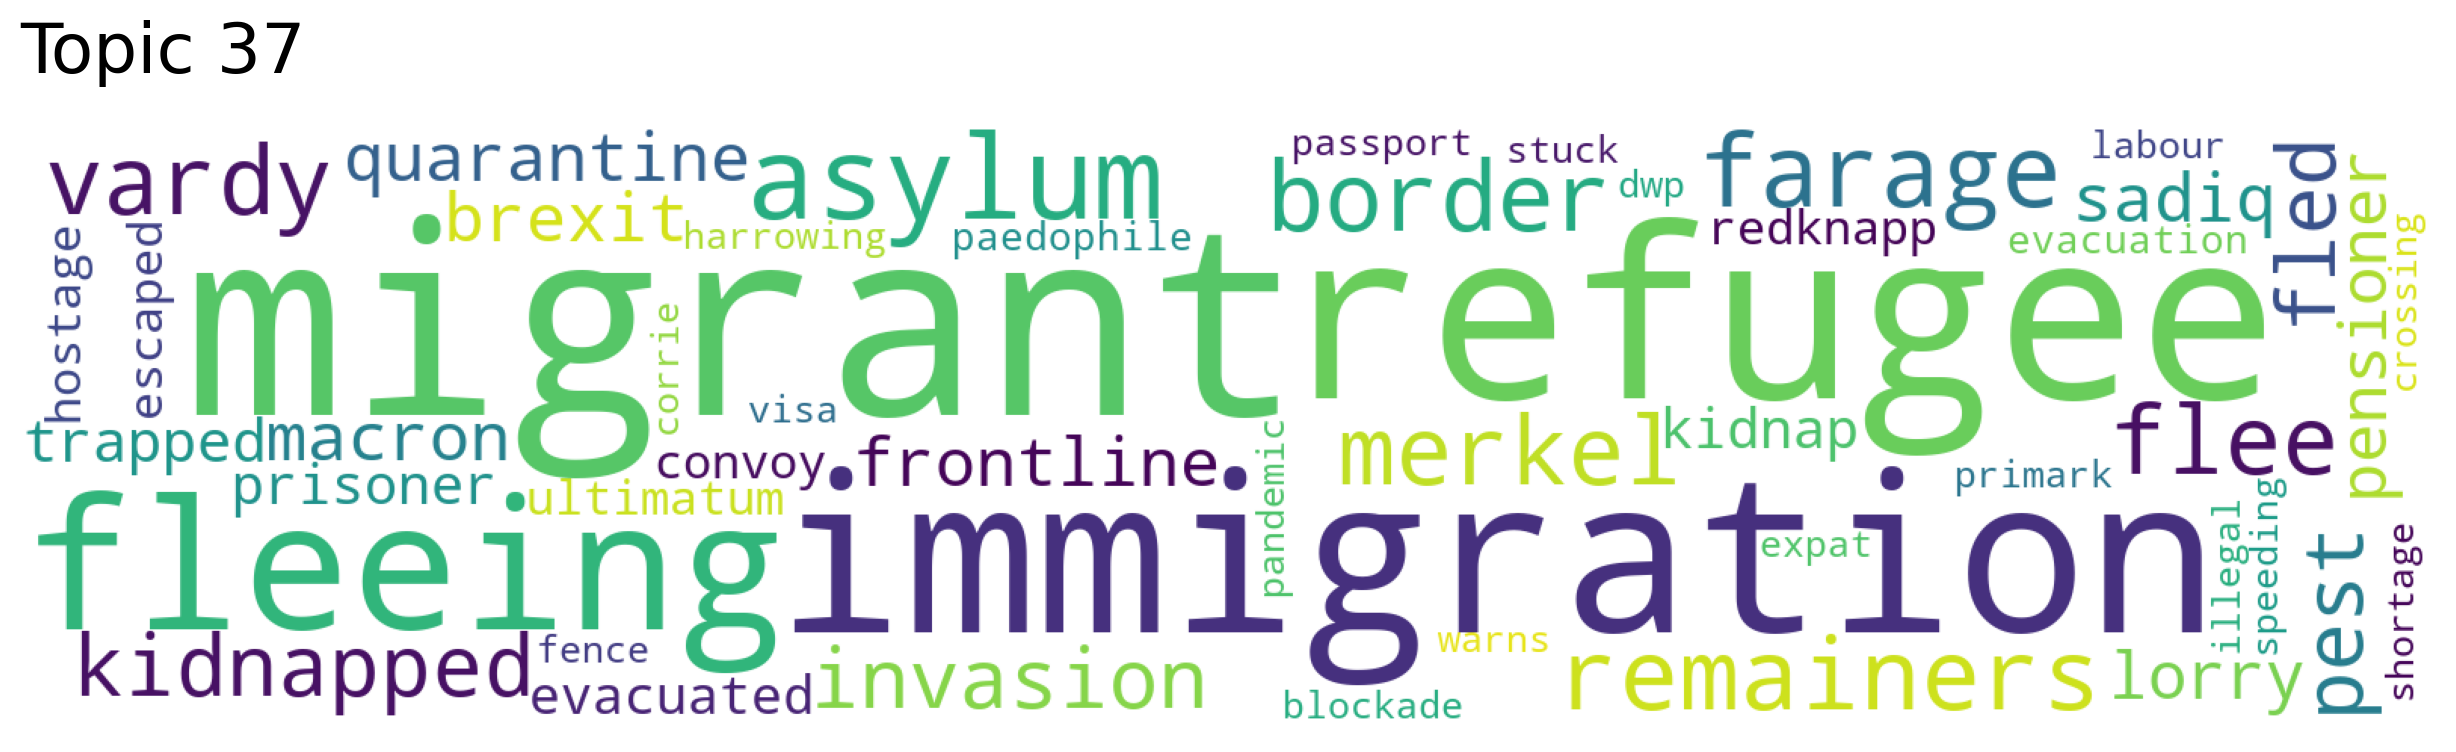

In [ ]:
model_5.generate_topic_wordcloud(topic_num=37, background_color='white')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["refugee"], num_topics=5)
topic_nums

array([345,  37, 807, 402, 289])

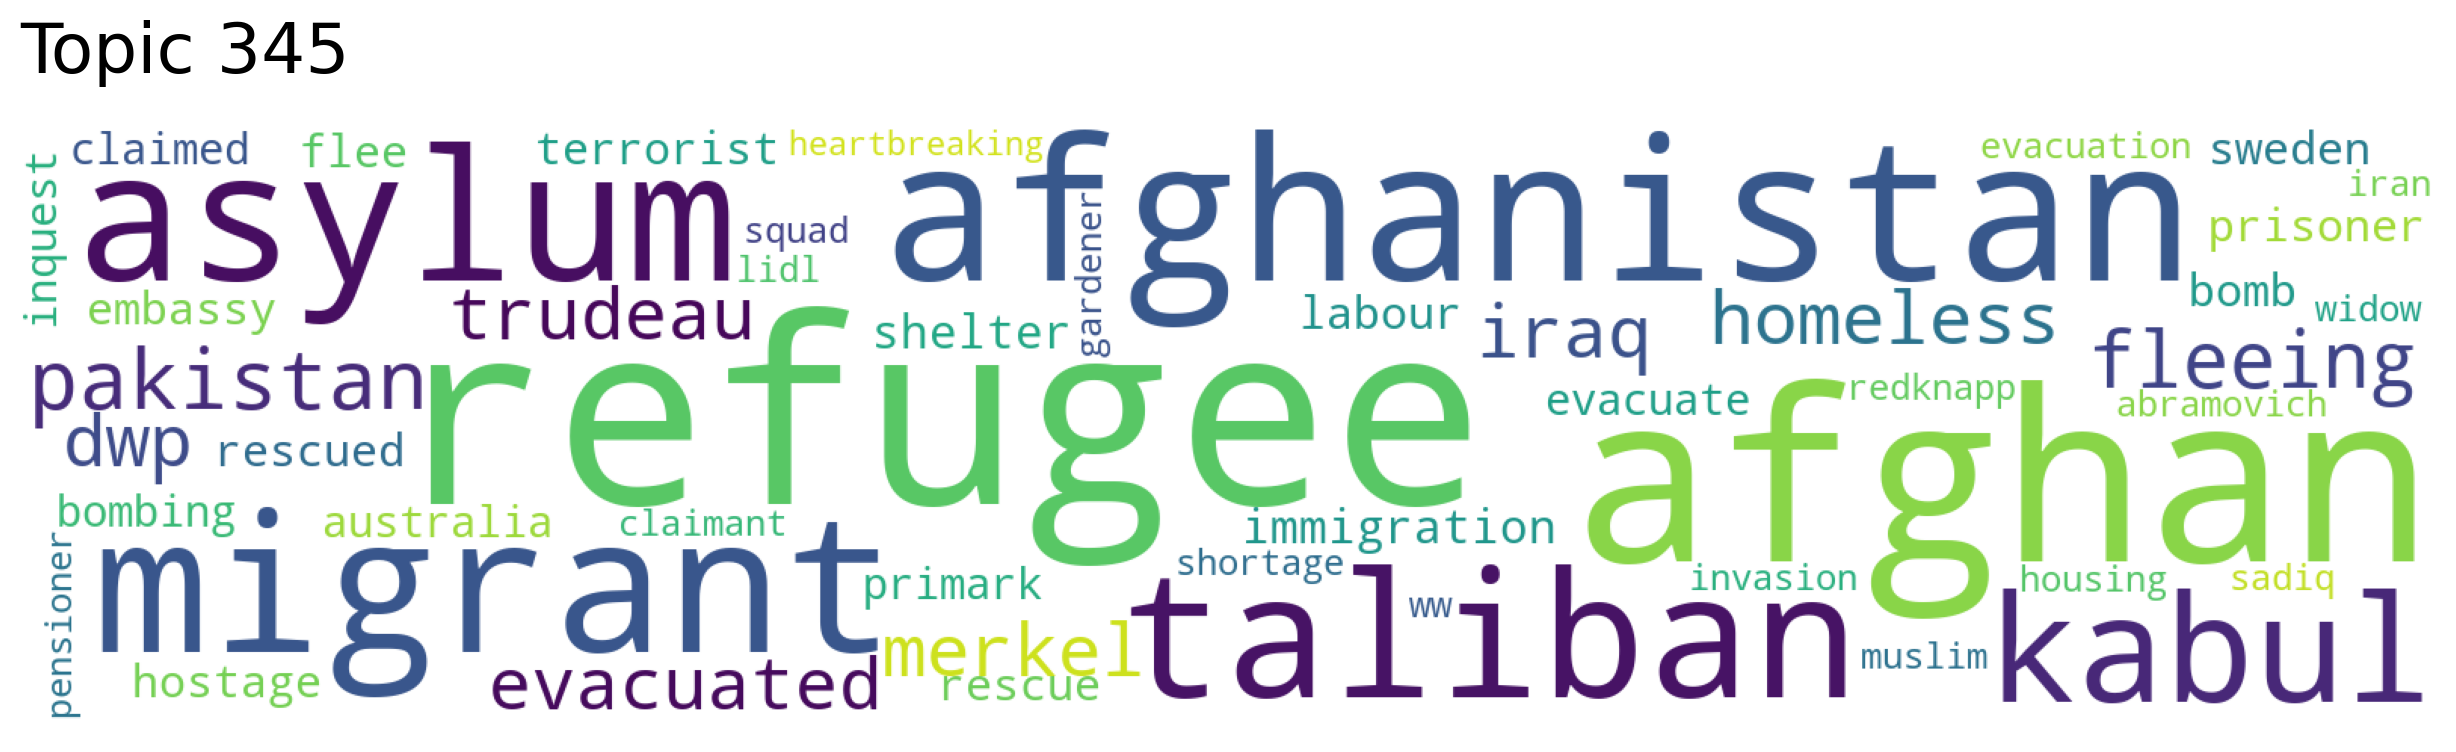

In [ ]:
model_5.generate_topic_wordcloud(topic_num=345,background_color='white')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["asylum"], num_topics=5)
topic_nums

array([345,  37, 394, 289, 414])

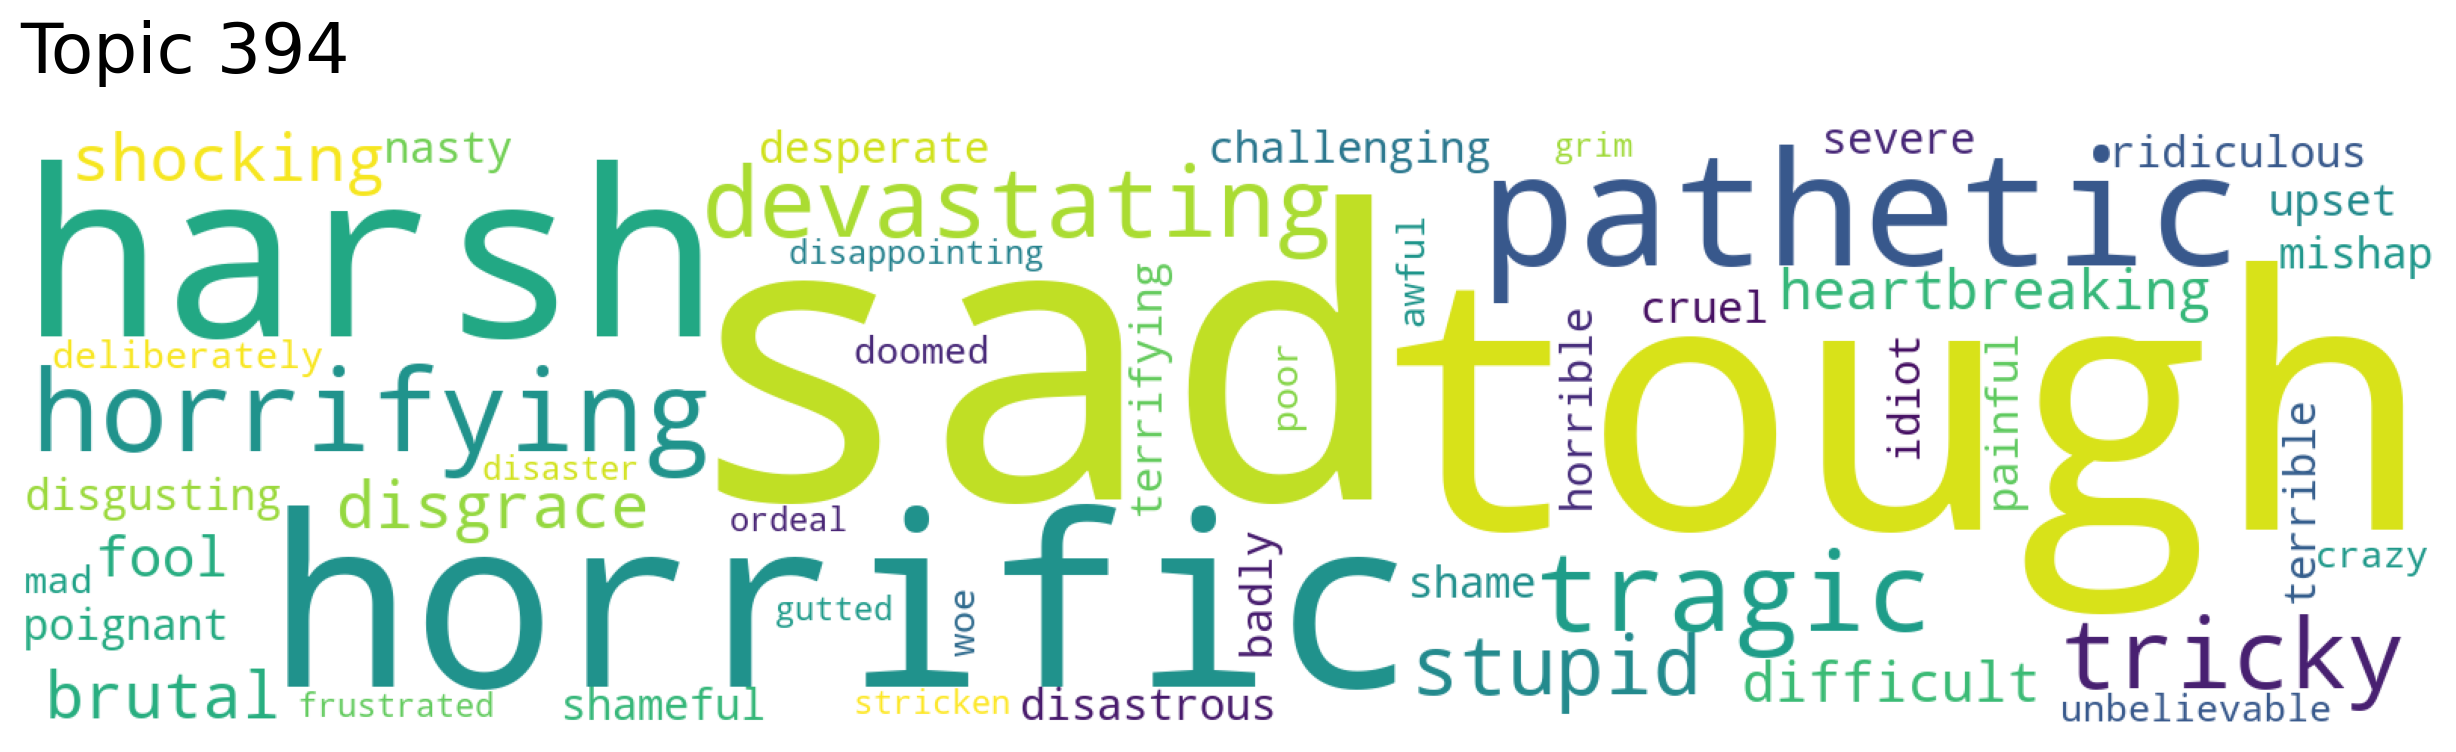

In [ ]:
model_5.generate_topic_wordcloud(topic_num=394, background_color='white')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["muslim"], num_topics=5)
topic_nums

array([1041,  394,  851, 1099,  464])

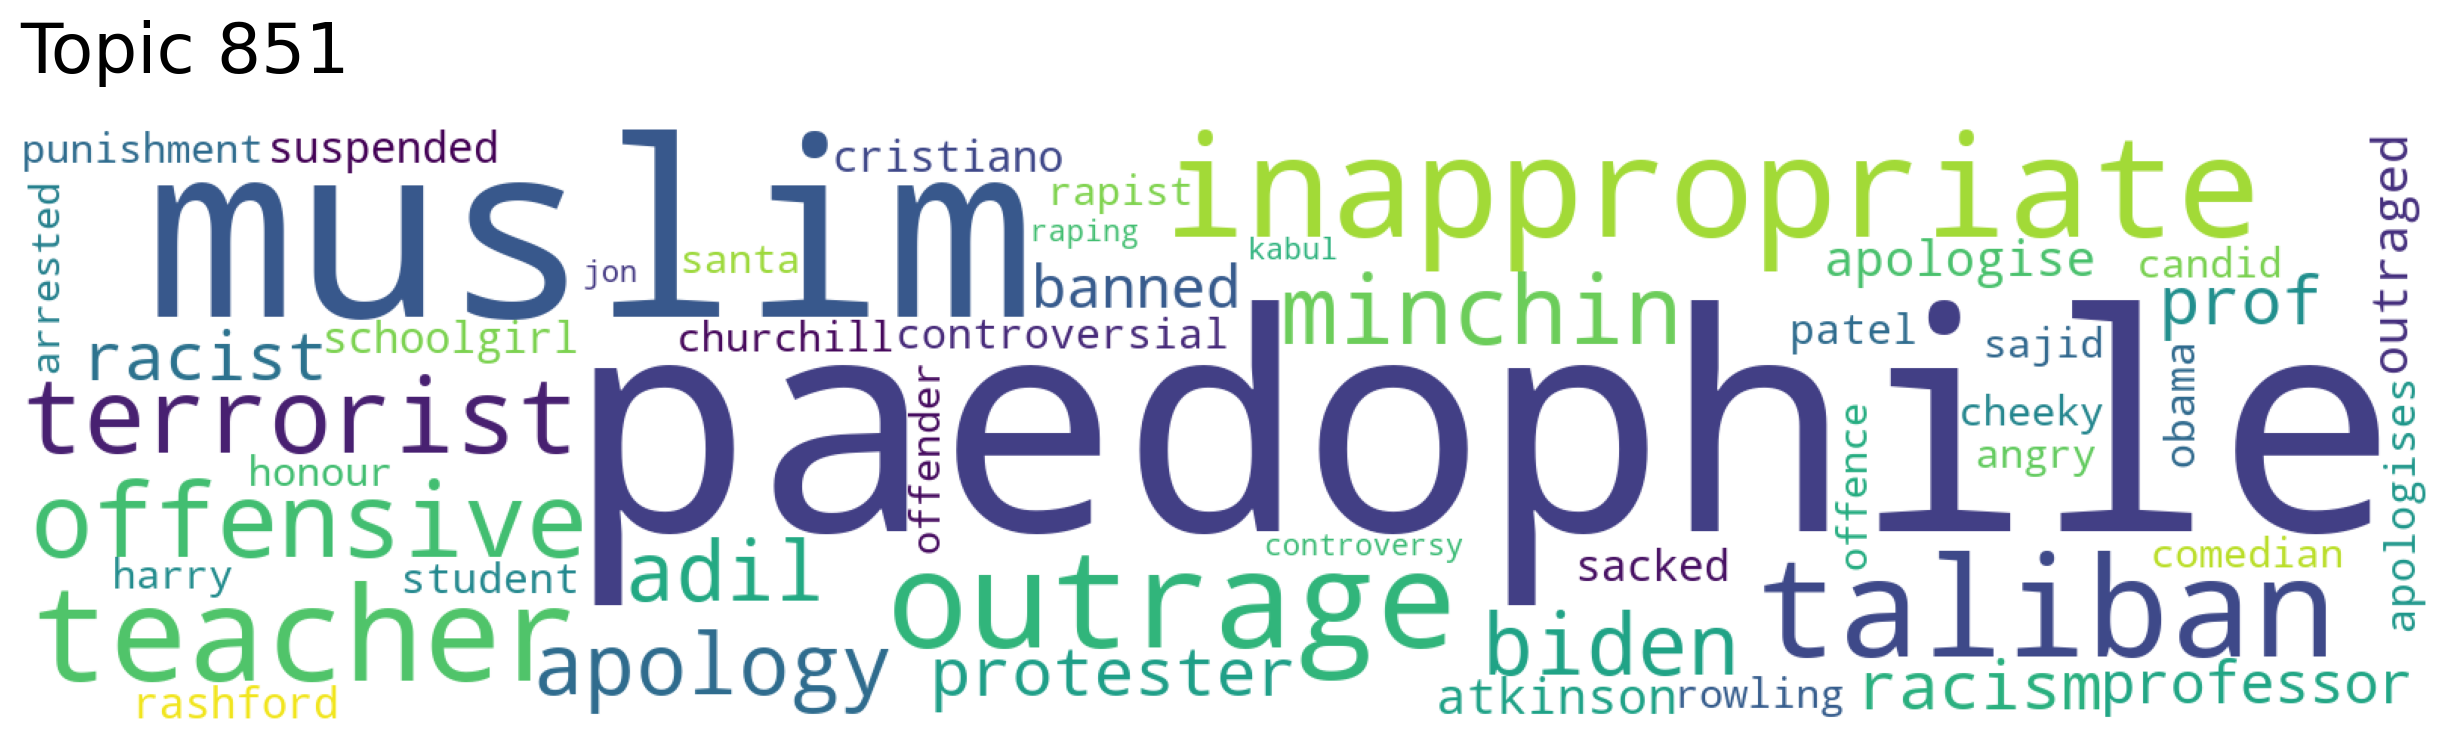

In [ ]:
model_5.generate_topic_wordcloud(topic_num=851, background_color='white')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["ukraine"], num_topics=5)
topic_nums

array([   0, 1208,  950,  400, 1244])

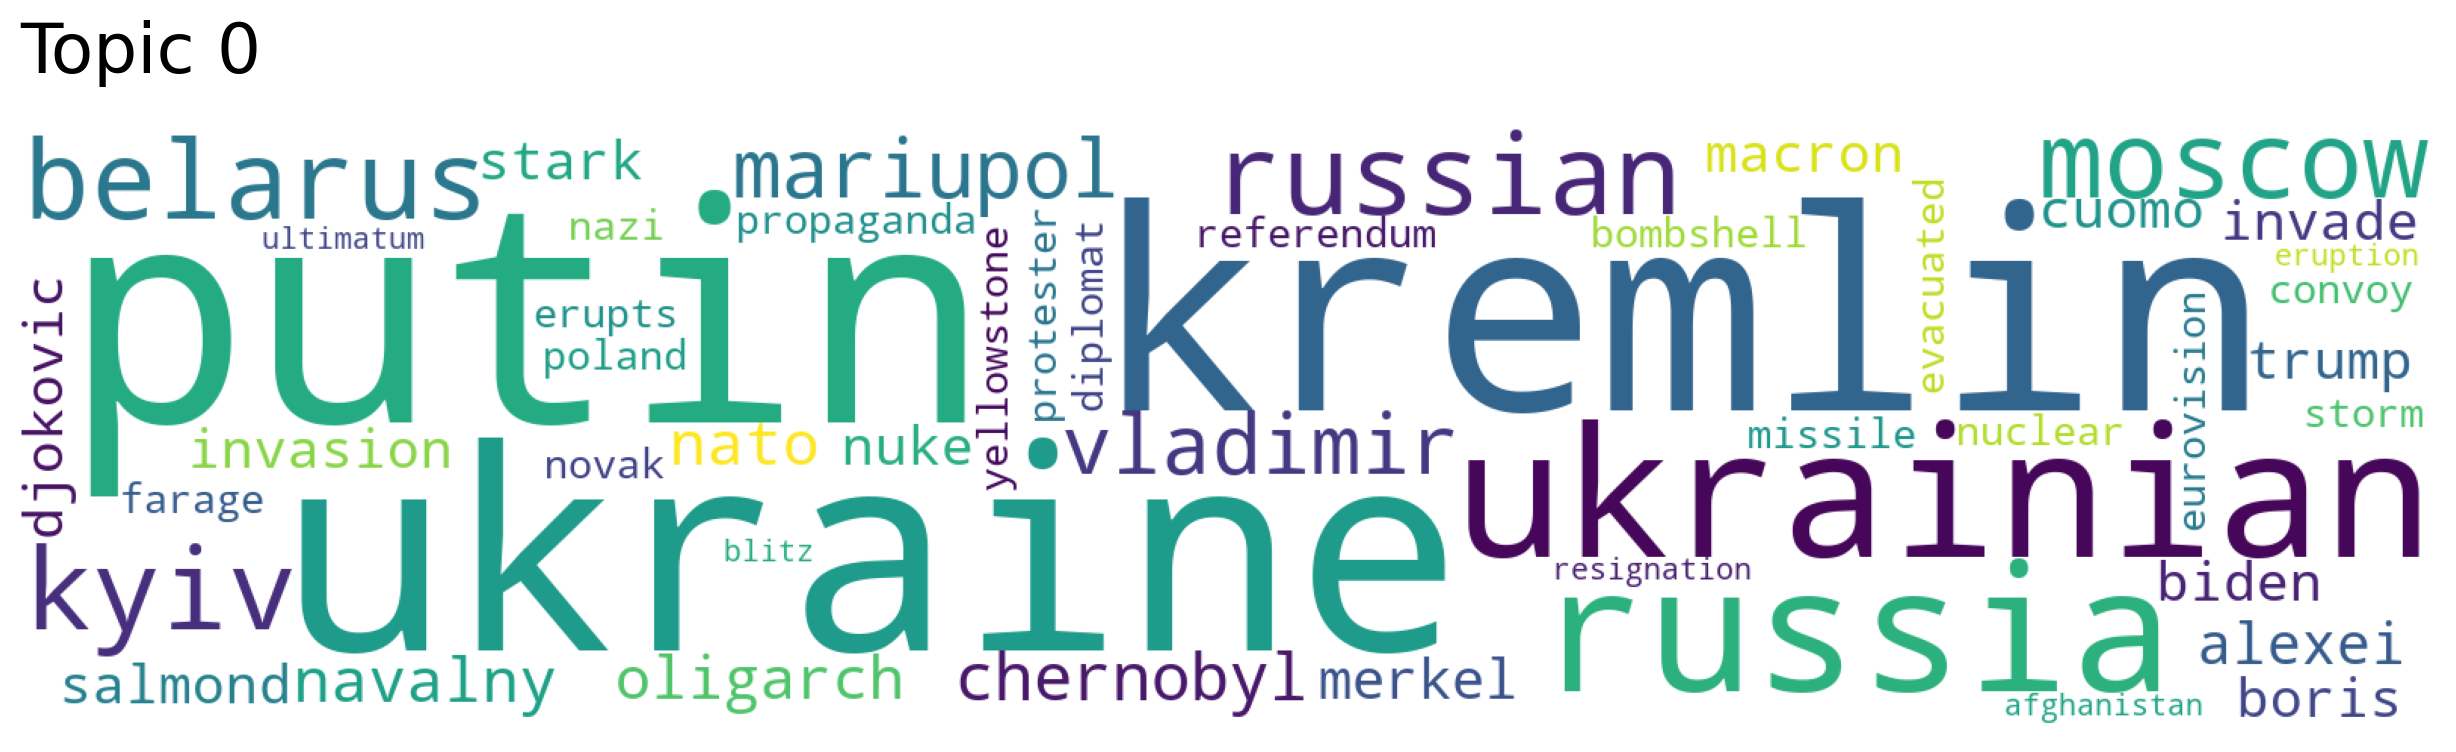

In [ ]:
model_5.generate_topic_wordcloud(topic_num=0, background_color='white')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["polish"], num_topics=5)
topic_nums

array([183, 289, 394, 464, 958])

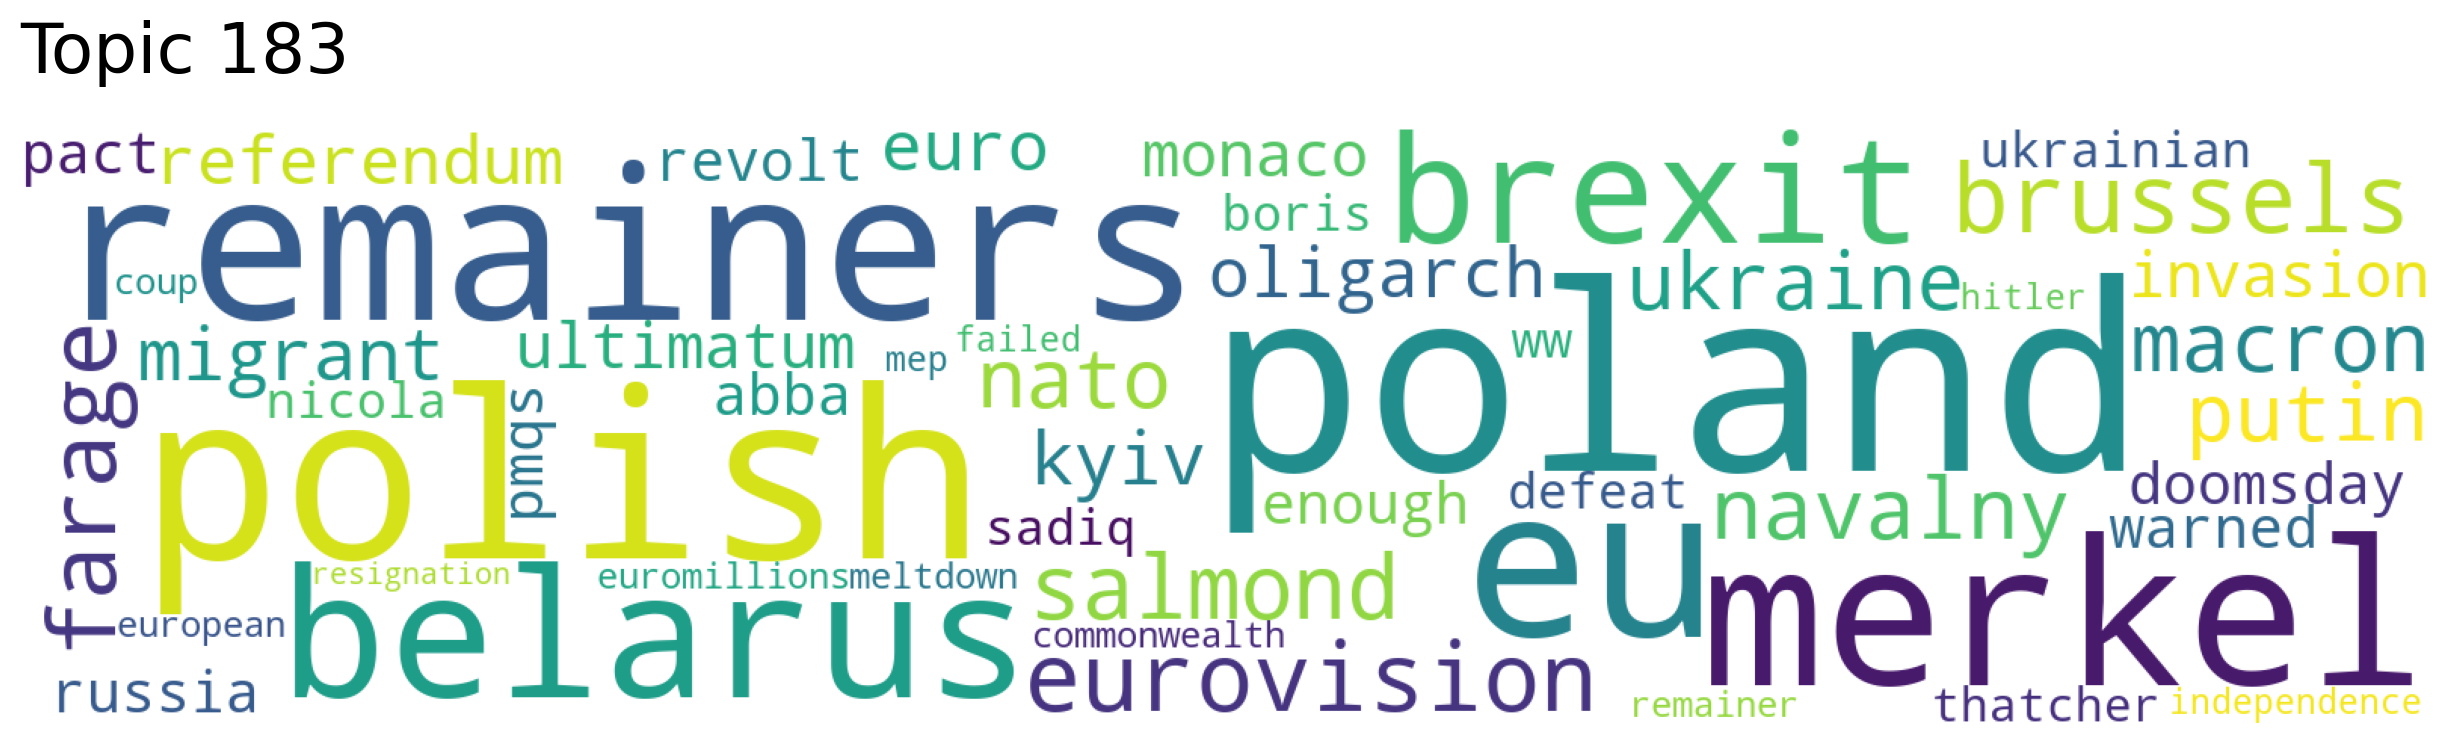

In [ ]:
model_5.generate_topic_wordcloud(topic_num=183, background_color='white')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["rwanda"], num_topics=5)
topic_nums

array([ 871,  338,  376, 1125,  648])

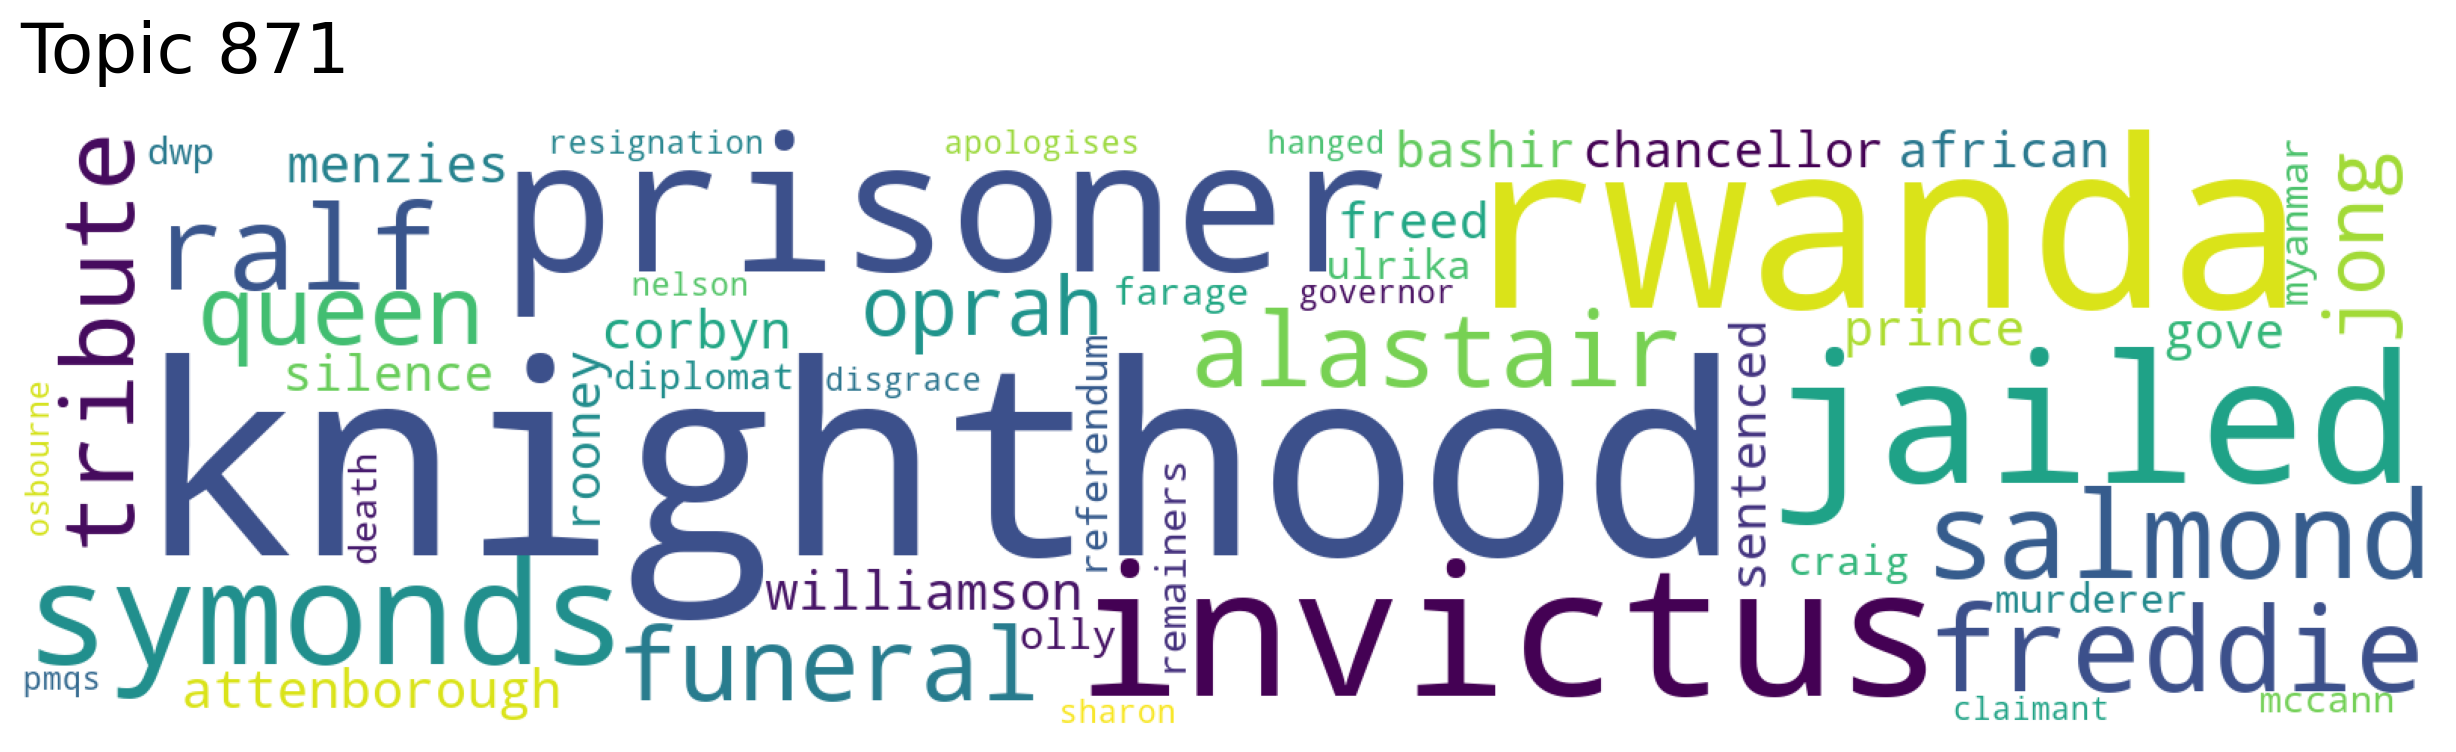

In [ ]:
model_5.generate_topic_wordcloud(topic_num=871, background_color='white')